#IT Area Event 2019
## ING Machine Learning workshop

The goal of this workshop is to learn *something* about Machine Learning by going through the model building process step by step. The goal is *not* to build the most accurate model but rather understand what steps are involved to get to your first minimal viable model. Building a good machine learning model is an iterative process, this workshop is a good starting point for engineers who want to get a first try at practical machine learning.

### Business case

Every machine learning project starts with a business problem. FC ING is bankcrupt and therefore the board has decided to sell all their players. Certainly they want to get the best deal, but they have not been up to date with the recent developments in the soccer industry. Thats why they need your help! 
Develop a Machine Learning model that:

- ### Predicts the value of a football player

In order to successfully build your first machine learning model, you just have to complete this Jupyter Notebook by following the instructions in the code cells. Please write your code in Python and use the pandas, numpy or sklearn library for help. 

<img src="https://ichef.bbci.co.uk/news/660/cpsprodpb/CF91/production/_103573135_neymareasports.jpg" alt="Drawing" style="width: 100px;"/>

### The dataset

The FIFA 2019 data set is an open source data set that contains detailed attributes of well-known soccer players (https://www.kaggle.com/karangadiya/fifa19).
The target variable that we want to predict is the "value" column. Everything else you can use as input/features for your model.

In [0]:
import pandas as pd # Pandas is a very handy Python library that helps you to load, clean, analyse and preprocess your data before you build a model.
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


In [11]:
# Load the dataset into a pandas Dataframe, print the shape and the first 5 rows to get a first glance at the data.
data = pd.read_csv('https://drive.google.com/uc?authuser=0&id=1XomAUds7vJ2aA2Rde0LAaKto3MldAeTH&export=download', sep = ",", index_col = 0)
data.head(n=5) 

,Name,Age,Nationality,Overall,Potential,Club,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,2202,Left,5,4,4,Medium/ Medium,RF,10,2004,2021,170.2,159lbs,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,2228,Right,5,4,5,High/ Low,ST,7,2018,2022,NaN,183lbs,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,2143,Right,5,5,5,High/ Medium,LW,10,2017,2022,NaN,150lbs,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,Spain,91,93,Manchester United,72000000,1471,Right,4,3,1,Medium/ Medium,GK,1,2011,2020,193.0,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,2281,Right,4,5,4,High/ High,RCM,7,2015,2023,180.3,154lbs,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13


### Preprocessing the data

(Big) data often comes in messy and unstructured format. For this workshop we choose a rather clean dataset but regardless you have to do some preprocessing to get the features ready for modeling.

In [12]:
no_nat_data = data.drop(columns=["Nationality"])
no_nat_data.head(n = 5)

,Name,Age,Overall,Potential,Club,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,FC Barcelona,110500000,2202,Left,5,4,4,Medium/ Medium,RF,10,2004,2021,170.2,159lbs,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,94,94,Juventus,77000000,2228,Right,5,4,5,High/ Low,ST,7,2018,2022,NaN,183lbs,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500000,2143,Right,5,5,5,High/ Medium,LW,10,2017,2022,NaN,150lbs,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,91,93,Manchester United,72000000,1471,Right,4,3,1,Medium/ Medium,GK,1,2011,2020,193.0,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,91,92,Manchester City,102000000,2281,Right,4,5,4,High/ High,RCM,7,2015,2023,180.3,154lbs,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13


In [13]:
# TO DO:
# - Transform the "Weight" column from String to Integer and from lbs to kg.
def trans_weight(weight):
  w = weight.replace("lbs", "")
  return np.float(w) * 0.45

lbs = "124lbs"
trans_weight(lbs)

55.800000000000004

In [14]:
weight_trans_data = no_nat_data.copy()

weight_trans_data["Weight"] = weight_trans_data["Weight"].apply(trans_weight)
weight_trans_data.head()

,Name,Age,Overall,Potential,Club,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,FC Barcelona,110500000,2202,Left,5,4,4,Medium/ Medium,RF,10,2004,2021,170.2,71.55,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,94,94,Juventus,77000000,2228,Right,5,4,5,High/ Low,ST,7,2018,2022,NaN,82.35,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500000,2143,Right,5,5,5,High/ Medium,LW,10,2017,2022,NaN,67.50,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,91,93,Manchester United,72000000,1471,Right,4,3,1,Medium/ Medium,GK,1,2011,2020,193.0,75.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,91,92,Manchester City,102000000,2281,Right,4,5,4,High/ High,RCM,7,2015,2023,180.3,69.30,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13


### Exploratory Data Analysis

In this step you want to explore your data, ask questions, find patterns and maybe create visualisation. Usually this is an interative process which you come back to throughout a Machine Learning project. It is a really valuable step to get to know your dataset. For example:

1. How is "Age" distributed among the players?
2. Do players with a high "Special" number have a greater "Value"?
3. Is the "Overall" score of a player related to his "Preferred Foot"?

Tip:

1. For a distribution plot have a look at https://seaborn.pydata.org/generated/seaborn.kdeplot.html
2. To see how two parameters relate to each other use: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
3. See 2

<Figure size 432x288 with 0 Axes>

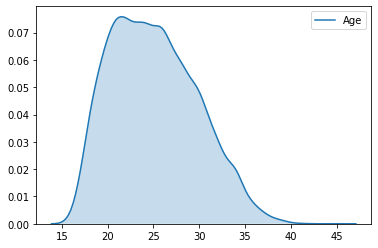

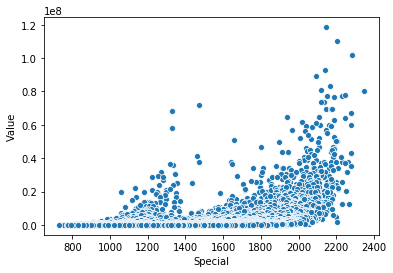

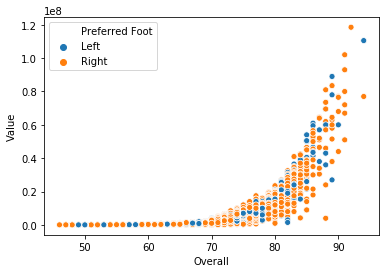

<Figure size 432x288 with 0 Axes>

In [15]:
#1 
sns.kdeplot(data["Age"], shade=True)
plt.figure()
#2
sns.scatterplot(x="Special", y="Value", data=data)
plt.figure()
#3
sns.scatterplot(x="Overall", y="Value", hue="Preferred Foot", data=data)
plt.figure()

### How to deal with missing values (NaN)

Often you have to deal with missing values in your dataset. Among many different methods you can replace missing values with the mean of the feature column. 

For example, any players that have height missing, we assign the average height of all players.


In [17]:
# TO DO:
# Calculate the average height of a player and fill all the NaN values with it.
# print(data.isna().sum().sum())
no_nan_data = weight_trans_data.copy()

print(no_nan_data['Height'].isna().sum())

no_nan_data['Height'] = no_nan_data['Height'].fillna(no_nan_data['Height'].mean())

print(no_nan_data['Height'].isna().sum())

10
0


### Feature selection 

Correlation and regression analysis are related in the sense that both deal with relationships among variables. The correlation coefficient is a measure of linear association between two variables. Values of the correlation coefficient are always between -1 and +1. A correlation coefficient of +1 indicates that two variables are perfectly related in a positive linear sense, a correlation coefficient of -1 indicates that two variables are perfectly related in a negative linear sense, and a correlation coefficient of 0 indicates that there is no linear relationship between the two variables. 

We use this concept to get an idea of what features to select for our model.


**Example:** 
If the age of a player is positively correlated to the value of a player, it might be a good predictor for our model because when age increases/decreases the value of a player increases/decreases.

**Tip:**  
DataFrame.corr https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [0]:
# TO DO:
# Print a list with the correlation values of all features with "Value". The pandas Dataframe has a method called .corr().
# Convert this list to absolute values.
# Sort this list from high to low.
index= no_nan_data.corr()["Value"].abs().sort_values(ascending=False)[:40].index.drop("Value")

### Build your first model

Now we are ready to build our first model! You never train the model on all of your data. You want to partition your data in 80% training data and 20% test data. 
The training data is used to train the model. Once you trained a model you have to evaluate how good it is. You evaluate a model by exposing it to unseen data. This is why you always set aside a test set. 

**Tip**:  
Select numeric data: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html 

Split data: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [0]:
#TO DO:
# Finally split the data into training and testing set with sklearn.model_selection.train_test_split().
# Make sure you use the "Value" column as your target (y) and the rest of the columns as your features (X).
# Only use numeric features.
features = no_nan_data.select_dtypes(exclude="object").drop("Value", axis=1)
target = no_nan_data["Value"]

X_train, X_test, y_train, y_test = train_test_split(features[index], target , test_size= 0.2)

Train your model (on the training data) with a regression algorithm of your choice. 

Choosing what model to use for modeling the problem at hand can be challenging. In order to guide you, please use the following guide to help you get started: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.

**Tip**: Sklearn is a great machine learning library that has a lot of models to choose from.

In [44]:
#TO DO
# Instantiate the model with its constructor.
# Train the model on training data.
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Evaluation of the model


Now that you trained a model, you want to investigate how well it will do on new unseen data. That is why we always hold out a small partion of the data, called the test set.
There are many different evaluation metrics in machine learning. Depending on the algorithm you use you choose this metric.
For simplicity, we will use the Root Mean Square Error (RMSE). When we talk about model we actually mean fitting a line/function to our training data by minimizing the error distance of that line and the datapoints. The RMSE is the distance, on average, of a data point from the fitted line, measured along a vertical line. That is probably the most easily interpreted statistic, since it has the same units as the quantity plotted on the vertical axis. In our case that is the value in €. Thus, the small the RSME, the better your model. 

In [0]:
# TO DO:
# Use the model's predict method on the test data.
predictions = clf.predict(X_test)

The following code will calculate the RMSE for your predictions. It also supplies a helper method to compare your predictions to the actual values. Just run the cell and check your results!

You dont need to write any code yourself here, but try to interpret your results.


In [46]:
# Helper method to pretty print results about your model
def print_predictions(pred, real) -> None:
  # Prepare for concatenation
  pred_array = pred.reshape(-1,1)
  real_array = real.to_numpy().reshape(-1,1)
  
  # Concatenate real value, predictions and difference as a pandas DataFrame
  diff = abs(pred_array - real_array)
  results = np.concatenate((real_array, pred_array, diff), axis=1)
  df_results = pd.DataFrame(results, columns=["Real value", "Predicted value", "Difference"])

  print("Showing difference in predicted and real value for first 5 players: \n")
  print(df_results.head())

  print("\nListing difference in predicted and real value sorting by greatest difference: \n")
  print(df_results.sort_values(by="Difference", ascending=False).head())

  # Calculate the RMSE
  rmse = sqrt(mean_squared_error(real_array, pred_array))
  print("\n Model score: \n")
  print(rmse)

#ensure that the test set you created when splitting the data is called test_y or change the field name here.
print_predictions(predictions, y_test) 

Showing difference in predicted and real value for first 5 players: 

   Real value  Predicted value  Difference
0    220000.0         215000.0      5000.0
1    500000.0         450000.0     50000.0
2    525000.0         525000.0         0.0
3   1000000.0         942500.0     57500.0
4   2700000.0        2410000.0    290000.0

Listing difference in predicted and real value sorting by greatest difference: 

      Real value  Predicted value  Difference
588    4000000.0       47800000.0  43800000.0
2093  24000000.0       48800000.0  24800000.0
145   27000000.0       48450000.0  21450000.0
1023   9000000.0       20200000.0  11200000.0
1544  80000000.0       91200000.0  11200000.0

 Model score: 

1266328.4470788515


### Submit your results to codalab

The fun part of this workshop is to compete with your colleagues on who developed the best model.

Below you can find a small dataset that we kept from you. We want you to make predictions on this data to see how your model performs on our unseen data. 

Don't forget to run the preprocessing (weight transformation) on this data too!

In [0]:
data_codalab = pd.read_csv('https://drive.google.com/uc?authuser=0&id=1avU0LzKHbskkkSney4Jh3lAvfib1zA7c&export=download', sep = ",", index_col = 0)

In [0]:
data_codalab = data_codalab._get_numeric_data()
codalab_predictions = rf.predict(data_codalab)

In [0]:
import zipfile
pd.Series(codalab_predictions, index=data_codalab.index).to_csv('submission.csv', header=False)
with zipfile.ZipFile("submission.zip", "w") as file:
  file.write('submission.csv')